Install fbprophet package as follows:
```
!pip install fbprophet
```

If you encounter error, try:  

```
conda install -c conda-forge fbprophet
```


In [88]:
!pip install fbprophet

In [0]:
# import libraries
import pandas as pd # Import Numpy for data manipulation using dataframe
import numpy as np # Import Numpy for Data statistical Analysis
import seaborn as sns # Import Matplotlib for data analysis
import matplotlib.pyplot as plt
from fbprophet import Prophet

Import data for Eicher motors stock dataset

In [90]:
stock_dataset_csv = pd.read_csv("EICHERMOT.csv")
stock_dataset_csv.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2020-02-24,EICHERMOT,EQ,18848.65,18700.0,18700.0,17800.10,17995.00,17949.95,18254.19,192821,3.519792e+14,44028.0,75285.0,0.3904
1,2020-02-25,EICHERMOT,EQ,17949.95,18135.0,18230.0,17321.00,17555.05,17532.30,17572.72,256831,4.513220e+14,56676.0,104350.0,0.4063
2,2020-02-26,EICHERMOT,EQ,17532.30,17430.0,17600.0,17035.40,17237.30,17156.95,17285.51,215113,3.718339e+14,54182.0,50775.0,0.2360
3,2020-02-27,EICHERMOT,EQ,17156.95,17167.8,17248.0,16906.10,17085.00,17053.40,17044.09,255481,4.354441e+14,56698.0,107805.0,0.4220
4,2020-02-28,EICHERMOT,EQ,17053.40,16697.0,16848.0,16317.05,16610.10,16602.35,16528.57,326455,5.395835e+14,65354.0,148997.0,0.4564
5,2020-03-02,EICHERMOT,EQ,16602.35,16666.0,17782.9,16643.00,17013.40,17013.40,17290.64,348370,6.023539e+14,74505.0,32873.0,0.0944
6,2020-03-03,EICHERMOT,EQ,17013.40,17500.0,18041.0,17400.00,17950.00,17888.45,17694.39,274740,4.861358e+14,68868.0,57676.0,0.2099
7,2020-03-04,EICHERMOT,EQ,17888.45,17954.0,18280.0,16870.00,17171.55,17254.20,17301.52,418609,7.242574e+14,79891.0,148265.0,0.3542
8,2020-03-05,EICHERMOT,EQ,17254.20,17450.0,17888.0,17161.80,17765.55,17775.35,17626.16,231375,4.078253e+14,52927.0,46350.0,0.2003
9,2020-03-06,EICHERMOT,EQ,17775.35,17350.0,17871.5,16822.00,17810.00,17743.55,17461.91,170791,2.982337e+14,47537.0,32484.0,0.1902


Size of Eicher motor Dataset

 Its 63 days data 

In [91]:
stock_dataset_csv.shape

(63, 15)

Remove unnecessary columns

In [0]:
stock_dataset_csv.drop(["Symbol","Series","Prev Close","VWAP","Volume","Deliverable Volume"],axis=1,inplace=True)

In [93]:
stock_dataset_csv.head(10)

,Date,Open,High,Low,Last,Close,Turnover,Trades,%Deliverble
0,2020-02-24,18700.0,18700.0,17800.10,17995.00,17949.95,3.519792e+14,44028.0,0.3904
1,2020-02-25,18135.0,18230.0,17321.00,17555.05,17532.30,4.513220e+14,56676.0,0.4063
2,2020-02-26,17430.0,17600.0,17035.40,17237.30,17156.95,3.718339e+14,54182.0,0.2360
3,2020-02-27,17167.8,17248.0,16906.10,17085.00,17053.40,4.354441e+14,56698.0,0.4220
4,2020-02-28,16697.0,16848.0,16317.05,16610.10,16602.35,5.395835e+14,65354.0,0.4564
5,2020-03-02,16666.0,17782.9,16643.00,17013.40,17013.40,6.023539e+14,74505.0,0.0944
6,2020-03-03,17500.0,18041.0,17400.00,17950.00,17888.45,4.861358e+14,68868.0,0.2099
7,2020-03-04,17954.0,18280.0,16870.00,17171.55,17254.20,7.242574e+14,79891.0,0.3542
8,2020-03-05,17450.0,17888.0,17161.80,17765.55,17775.35,4.078253e+14,52927.0,0.2003
9,2020-03-06,17350.0,17871.5,16822.00,17810.00,17743.55,2.982337e+14,47537.0,0.1902


Plot Open values of stock w.r.t to date

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


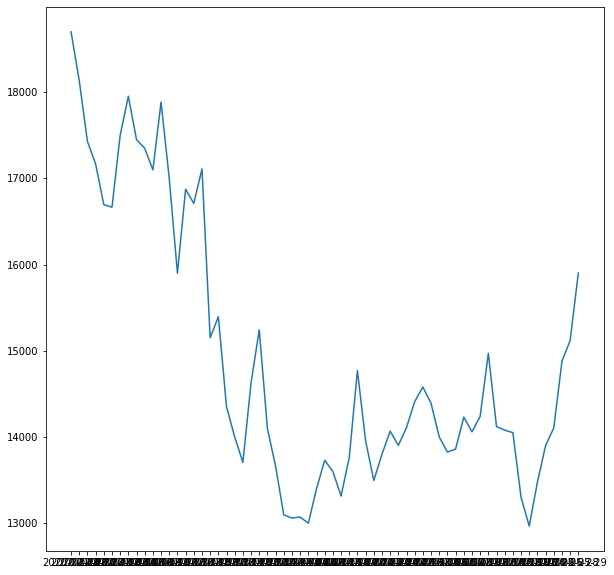

In [94]:
plt.figure(figsize=(10,10))
plt.plot(stock_dataset_csv["Date"],stock_dataset_csv["Open"])

Plot Open and Close values together

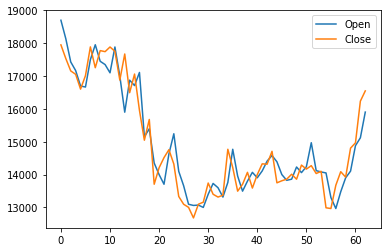

In [95]:
stock_dataset_csv.plot(y=["Open","Close"])

In [96]:
#Import Crudeoil price dataset 
crudeoil_report_csv=pd.read_csv("Crudeoil.csv")
crudeoil_report_csv.head()

,Instrument Type,Date,Segment,Commodity,Traded Contract(Lots),Total Value (Lacs),Avg Daily Turnover (Lacs)
0,FUTCOM,2020-01-01,ENERGY,CRUDEOIL,21689,94903.27,0.0
1,FUTCOM,2020-01-02,ENERGY,CRUDEOIL,339888,1481849.33,0.0
2,FUTCOM,2020-01-03,ENERGY,CRUDEOIL,532296,2413806.37,0.0
3,FUTCOM,2020-01-06,ENERGY,CRUDEOIL,427787,1963769.09,0.0
4,FUTCOM,2020-01-07,ENERGY,CRUDEOIL,355248,1600428.34,0.0


Plot Crude oil prices w.r.t date

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


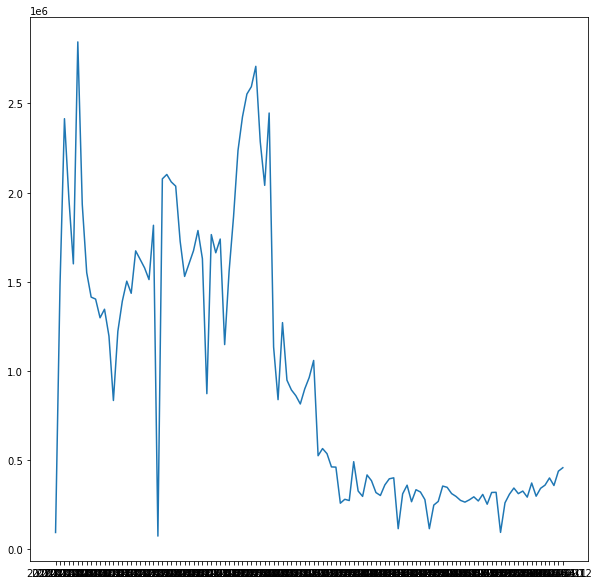

In [97]:
plt.figure(figsize=(10,10))
plt.plot(crudeoil_report_csv["Date"],crudeoil_report_csv["Total Value (Lacs)"])

Remove unnecessary columns

In [0]:
useless_cols = ["Instrument Type","Segment","Commodity","Traded Contract(Lots)","Avg Daily Turnover (Lacs)"]

In [0]:
crudeoil_report_csv.drop(useless_cols,axis=1,inplace=True)

In [100]:
crudeoil_report_csv.head()

,Date,Total Value (Lacs)
0,2020-01-01,94903.27
1,2020-01-02,1481849.33
2,2020-01-03,2413806.37
3,2020-01-06,1963769.09
4,2020-01-07,1600428.34


In order to merge two tables, they should have same primary key.

Changed the Key to Date in both the tables

In [0]:
crudeoil_report_csv.set_index("Date",inplace=True)

In [0]:
stock_dataset_csv.set_index("Date",inplace=True)

Join the COVID19 table with Stock table

In [103]:
data = stock_dataset_csv.join(crudeoil_report_csv,how="inner")
data.head()

,Open,High,Low,Last,Close,Turnover,Trades,%Deliverble,Total Value (Lacs)
Date,,,,,,,,,
2020-02-24,18700.0,18700.0,17800.10,17995.00,17949.95,3.519792e+14,44028.0,0.3904,1558751.70
2020-02-25,18135.0,18230.0,17321.00,17555.05,17532.30,4.513220e+14,56676.0,0.4063,1865144.53
2020-02-26,17430.0,17600.0,17035.40,17237.30,17156.95,3.718339e+14,54182.0,0.2360,2235781.23
2020-02-27,17167.8,17248.0,16906.10,17085.00,17053.40,4.354441e+14,56698.0,0.4220,2423555.97
2020-02-28,16697.0,16848.0,16317.05,16610.10,16602.35,5.395835e+14,65354.0,0.4564,2551718.69


Calculate the correlation between Stock data and corona data

In [104]:
data.corr()

,Open,High,Low,Last,Close,Turnover,Trades,%Deliverble,Total Value (Lacs)
Open,1.000000,0.947808,0.977249,0.942637,0.943038,0.284973,0.079392,0.143781,0.817546
High,0.947808,1.000000,0.936600,0.950156,0.956371,0.361446,0.191765,0.173815,0.775851
Low,0.977249,0.936600,1.000000,0.970441,0.971249,0.328881,0.109652,0.085908,0.822788
Last,0.942637,0.950156,0.970441,1.000000,0.999096,0.393140,0.203628,0.063155,0.798555
Close,0.943038,0.956371,0.971249,0.999096,1.000000,0.403420,0.214199,0.068395,0.796544
Turnover,0.284973,0.361446,0.328881,0.393140,0.403420,1.000000,0.929984,-0.006051,0.178907
Trades,0.079392,0.191765,0.109652,0.203628,0.214199,0.929984,1.000000,0.019849,0.017102
%Deliverble,0.143781,0.173815,0.085908,0.063155,0.068395,-0.006051,0.019849,1.000000,0.106976
Total Value (Lacs),0.817546,0.775851,0.822788,0.798555,0.796544,0.178907,0.017102,0.106976,1.000000


Used Seaborn to plot the time series

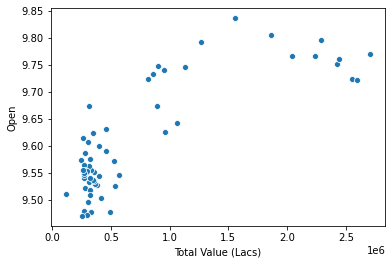

In [105]:
x = data["Total Value (Lacs)"]
y = data["Open"]
sns.scatterplot(x,np.log(y))

Plot regression line

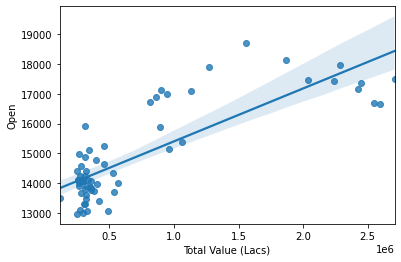

In [106]:
sns.regplot(x,y)

From the graph it can be observed that there is a increase in stock value as total value of crude oil increased. There is a positive correlation between stock price and Open stock market data

# Machine learning

Machine learning Part consists of two parts 

(1) Eicher Motors stock market prediction

(2) Crude oil value prediction

In [107]:
#Import Eicher motors data 
stock_df=pd.read_csv("EICHERMOT.csv")
stock_df.set_index("Date",inplace=True)
#Import Crudeoil data
crudeoil_df=pd.read_csv("Crudeoil.csv")
crudeoil_df.set_index("Date",inplace=True)
#Join the Eicher motors dataset and Crudeoil dataset
data = stock_df.join(crudeoil_df,how="inner")
stock_data = data.reset_index()
stock_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Instrument Type,Segment,Commodity,Traded Contract(Lots),Total Value (Lacs),Avg Daily Turnover (Lacs)
0,2020-02-24,EICHERMOT,EQ,18848.65,18700.0,18700.0,17800.10,17995.00,17949.95,18254.19,192821,3.519792e+14,44028.0,75285.0,0.3904,FUTCOM,ENERGY,CRUDEOIL,420476,1558751.70,0.0
1,2020-02-25,EICHERMOT,EQ,17949.95,18135.0,18230.0,17321.00,17555.05,17532.30,17572.72,256831,4.513220e+14,56676.0,104350.0,0.4063,FUTCOM,ENERGY,CRUDEOIL,505246,1865144.53,0.0
2,2020-02-26,EICHERMOT,EQ,17532.30,17430.0,17600.0,17035.40,17237.30,17156.95,17285.51,215113,3.718339e+14,54182.0,50775.0,0.2360,FUTCOM,ENERGY,CRUDEOIL,625902,2235781.23,0.0
3,2020-02-27,EICHERMOT,EQ,17156.95,17167.8,17248.0,16906.10,17085.00,17053.40,17044.09,255481,4.354441e+14,56698.0,107805.0,0.4220,FUTCOM,ENERGY,CRUDEOIL,713304,2423555.97,0.0
4,2020-02-28,EICHERMOT,EQ,17053.40,16697.0,16848.0,16317.05,16610.10,16602.35,16528.57,326455,5.395835e+14,65354.0,148997.0,0.4564,FUTCOM,ENERGY,CRUDEOIL,776254,2551718.69,0.0


Prepare the input dataset before applying the Facebook Prophet tool

In [108]:
stock_prophet_open = stock_data[['Date','Open']]
stock_prophet_open = stock_prophet_open.rename(columns = {'Date': 'ds', 'Open': 'y'})
stock_prophet_open

,ds,y
0,2020-02-24,18700.0
1,2020-02-25,18135.0
2,2020-02-26,17430.0
3,2020-02-27,17167.8
4,2020-02-28,16697.0
...,...,...
58,2020-05-22,13901.0
59,2020-05-26,14105.0
60,2020-05-27,14880.0
61,2020-05-28,15120.0


Prophet is open source software released by Faceook's core Datascience team

In [109]:
m = Prophet()
m.fit(stock_prophet_open)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Lets develop the model and make prediction of stock value of Eicher motors for next 30 days


In [0]:
future = m.make_future_dataframe(periods = 30)
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]

Forecasting 

In [111]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-24,10146.894124,17540.482134,19197.867451,10146.894124,10146.894124,8234.548505,8234.548505,8234.548505,8234.548505,8234.548505,8234.548505,0.0,0.0,0.0,18381.442628
1,2020-02-25,10029.553634,17202.832280,18839.317300,10029.553634,10029.553634,7985.535885,7985.535885,7985.535885,7985.535885,7985.535885,7985.535885,0.0,0.0,0.0,18015.089520
2,2020-02-26,9912.213145,17228.786950,18829.262148,9912.213145,9912.213145,8135.597907,8135.597907,8135.597907,8135.597907,8135.597907,8135.597907,0.0,0.0,0.0,18047.811052
3,2020-02-27,9794.872655,17043.922006,18683.479682,9794.872655,9794.872655,8072.385137,8072.385137,8072.385137,8072.385137,8072.385137,8072.385137,0.0,0.0,0.0,17867.257792
4,2020-02-28,9677.532166,16975.234957,18570.261708,9677.532166,9677.532166,8160.240069,8160.240069,8160.240069,8160.240069,8160.240069,8160.240069,0.0,0.0,0.0,17837.772235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2020-06-22,6495.473264,13782.536999,15584.893628,6184.847238,6821.629453,8234.548505,8234.548505,8234.548505,8234.548505,8234.548505,8234.548505,0.0,0.0,0.0,14730.021769
79,2020-06-23,6507.083042,13592.216151,15412.701284,6179.570043,6850.240646,7985.535885,7985.535885,7985.535885,7985.535885,7985.535885,7985.535885,0.0,0.0,0.0,14492.618927
80,2020-06-24,6518.692820,13750.226504,15495.233681,6166.230275,6876.111079,8135.597907,8135.597907,8135.597907,8135.597907,8135.597907,8135.597907,0.0,0.0,0.0,14654.290727
81,2020-06-25,6530.302597,13682.064798,15510.615735,6160.811950,6907.584228,8072.385137,8072.385137,8072.385137,8072.385137,8072.385137,8072.385137,0.0,0.0,0.0,14602.687734


Plot of existing and forecasted values of stock market

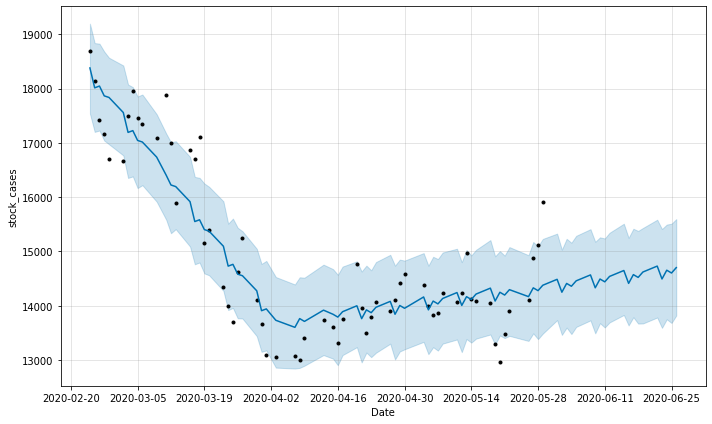

In [112]:
figure2 = m.plot(forecast,xlabel = 'Date', ylabel='stock_cases') 

There are two additional graphs:

(1) Trend of stock market value

(2) stock values based on the day

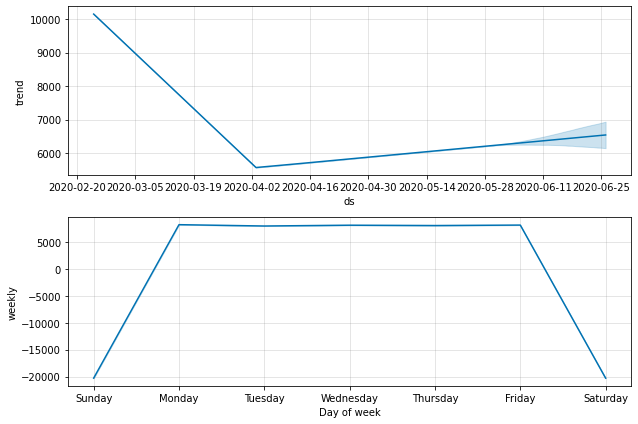

In [113]:
figure = m.plot_components(forecast)

# Predict the crude oil prices for next 30 days

Prepare the crudeoil dataset to perform prediction using facebook prophet

In [114]:

stock_prophet_crudeoil = stock_data[['Date','Total Value (Lacs)']]
stock_prophet_crudeoil = stock_prophet_crudeoil.rename(columns = {'Date': 'ds', 'Total Value (Lacs)': 'y'})
stock_prophet_crudeoil

,ds,y
0,2020-02-24,1558751.70
1,2020-02-25,1865144.53
2,2020-02-26,2235781.23
3,2020-02-27,2423555.97
4,2020-02-28,2551718.69
...,...,...
58,2020-05-22,320081.40
59,2020-05-26,261137.31
60,2020-05-27,309445.73
61,2020-05-28,343999.45


Forecasting

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


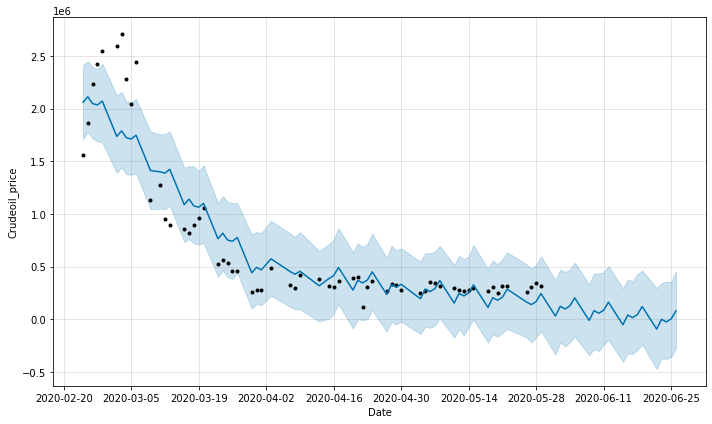

In [115]:
n = Prophet()
n.fit(stock_prophet_crudeoil)
future = n.make_future_dataframe(periods = 30)
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]
forecast_crudeoil = n.predict(future)
figure = n.plot(forecast_crudeoil,xlabel = 'Date', ylabel='Crudeoil_price')

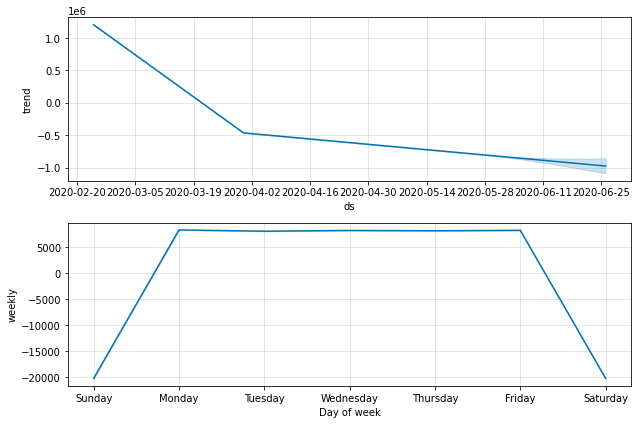

In [116]:
figure2 = m.plot_components(forecast_crudeoil)